Fourier Series

In [14]:
# Libraries
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

# Initialize and Declaration
exp, pi, cos, sin = np.exp, np.pi, np.cos, np.sin
xi = [0, 1, 5] # X(i)
yi = [2, 4, 2] # Y(i)
period, orde = 5, 4
half = period / 2
intersect = xi[1] # Point of Intersection

In [15]:
# Calculation
m = lambda n: (yi[n + 1] - yi[n]) / (xi[n + 1] - xi[n]) # Slope (i)
c = lambda n: - (m(n) * xi[n]) + yi[n] # Intercept (i)
for i in range(0, 2): # Analytical Function x(i)
    print(f'f{i + 1}(x) = {m(i)}x + {c(i)}; {xi[i]} < x < {xi[i + 1]}')
x1, x2 = np.arange(0, intersect, .01), np.arange(intersect, period, .01)
y1, y2 = m(0) * x1 + c(0), m(1) * x2 + c(1) # Function x(i)

a = lambda n: (integrate.simpson(y1 * cos(n*pi*x1/half), x1) + integrate.simpson(y2 * cos(n*pi*x2/half), x2)) / half # Fourier Coefficient
b = lambda n: (integrate.simpson(y1 * sin(n*pi*x1/half), x1) + integrate.simpson(y2 * sin(n*pi*x2/half), x2)) / half # Fourier Coefficient
for i in range(0, orde + 1):
    print(f'n = {i}: a{i} = {round(a(i), 5)}, b{i} = {round(b(i), 5)}')

f1(x) = 2.0x + 2.0; 0 < x < 1
f2(x) = -0.5x + 4.5; 1 < x < 5
n = 0: a0 = 5.97603, b0 = 0.0
n = 1: a1 = -0.45061, b1 = 0.58717
n = 2: a2 = -0.28161, b2 = 0.08361
n = 3: a3 = -0.12221, b3 = -0.03207
n = 4: a4 = -0.03991, b4 = -0.02214


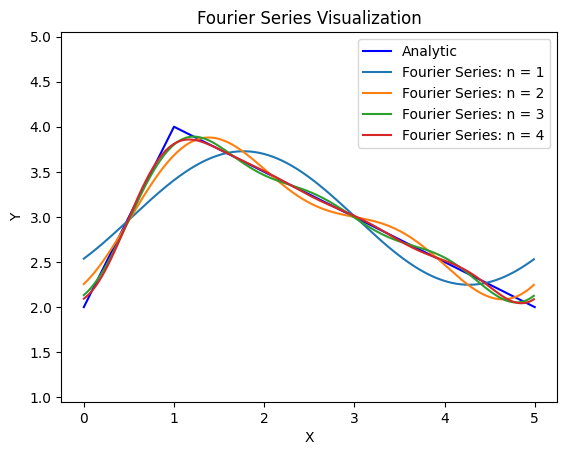

In [19]:
# Visualization
x = np.arange(0, period, .01)
y = lambda x: np.array([m(0) * i + c(0) if 0<i<intersect else m(1) * i + c(1) for i in x])
plt.plot(xi, yi, color = "blue", label = "Analytic")
# plt.plot(x, y(x), color = "blue", label = "Analytic")
for i in range (1, orde + 1):
    series = a(0) / 2 + sum([a(j) * cos(j*pi*x/half) + b(j) * sin(j*pi*x/half) for j in range(1, i + 1)])
    plt.plot(x, series, label = "Fourier Series: n = " + str(i))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fourier Series Visualization")
plt.legend(loc = "best")
plt.axis('equal')
plt.show()